# Prepare

Now we need to:

1. Test and make sure the functions from acquire.py work
2. Pull all the df from all the files
3. Marge all the df together:
    * I think we will still keep the data separate. Meaning one df for food_logs, one for activities and one for calories.

In [1]:
import acquire
import pandas as pd
import numpy as np

In [2]:
filename = '2018-10-28_through-2018-11-27.csv'

In [3]:
# calories, activities, food_logs = acquire.get_data(filename)

ValueError: ('Unknown string format:', ' Snack')

In [ ]:
calories.info()

In [ ]:
activities.info()

In [ ]:
# Test how to merge the dataframes - we will read another file and merge those

filename_2 = "2018-05-27_through_2018-06-26.csv"

In [ ]:
calories_2, activites_2, food_logs_2 = acquire.get_data(filename_2)

In [ ]:
calories.shape[0], calories_2.shape[0]

In [ ]:
# Join calories

calories = pd.concat([calories, calories_2])

In [ ]:
# Join activities

activities = pd.concat([activities, activites_2])

In [ ]:
activities

In [ ]:
activities.info()

In [ ]:
# Join food_logs

food_logs = pd.concat([food_logs, food_logs_2])

In [ ]:
food_logs.info()

In [56]:
filename = '2018-10-28_through-2018-11-27.csv'

In [57]:
rows = acquire.read_csv_file(filename)

In [58]:
indices = []
for i, elem in enumerate(rows):
    if rows[i] != []:

        if 'Food Log' in rows[i][0]:
            indices.append(i)
# Finds the indeces where it says food log

In [59]:
food_logs = pd.DataFrame(rows[indices[0]:])

In [60]:
food_logs["date"] = np.nan
dates = food_logs[0].unique()

dates = np.delete(dates, [1,3])

dates = np.delete(dates, [1])

In [61]:
food_logs.loc[60:90]

,0,1,2,date
60,Food Log 20181103,None,None,NaN
61,Meal,Food,Calories,NaN
62,Lunch,None,None,NaN
63,,"Meatballs, Italian Style",520,NaN
64,,Bangkok Peanut Dipping Sauce,133,NaN
65,,Flour Tortillas,200,NaN
66,Afternoon Snack,None,None,NaN
67,,"Crunchy Chickpeas, Salted Caramel",260,NaN
68,,Organic Blackberry Hibiscus Chia Vitality Beve...,120,NaN
69,Dinner,None,None,NaN


In [ ]:

    
    
    # Only need it if file name is ""2018-05-27_through_2018-06-26.csv""
    # food_logs = food_logs.drop([41,42,43,44,45]).reset_index().drop(columns="index")

    

    

    n_rows_start = 0
    n_rows_end = 9
    for i in range(0,food_logs[0].str.contains("Food Log").sum()):
        food_logs.loc[n_rows_start:n_rows_end, "date"] = dates[i]
        n_rows_start += 10
        n_rows_end += 10


    # Now I can drop column 0, and I need to break the date column and change it to data type
    

    food_logs.date = food_logs.date.str.slice(9,)

    food_logs['date'] = pd.to_datetime(food_logs['date'])

    food_logs = food_logs.dropna().set_index("date").rename(columns = {1:"Measure", 2: "Quantity"}).drop(columns= [0])

    food_logs.Quantity = food_logs.Quantity.str.replace("mg", '').str.replace("g", '').str.replace("fl oz", '').str.replace("Calories", "").str.replace(',', '').str.replace(' ', '')

    food_logs.Quantity = food_logs.Quantity.astype("int")
    
    food_logs[food_logs.Quantity == ''] = np.nan

    food_logs = food_logs.dropna()

    food_logs = pd.pivot_table(data=food_logs, values="Quantity", index =food_logs.index, columns="Measure")
    
    return food_logs



----------------------

# Merging all DFs

In [4]:
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

path = '.'
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))

In [5]:
result

['2018-09-27_through_2018-10-27.csv',
 '2018-07-28_through_2018-08-26.csv',
 '2018-06-27_through_2018-07-27.csv',
 '2018-04-26_through_2018-05-26.csv',
 '2018-10-28_through-2018-11-27.csv',
 '2018-11-28_through_2018-12-28.csv',
 '2018-05-27_through_2018-06-26.csv']

In [43]:
df = pd.DataFrame([])
df_1 = pd.DataFrame([])
for i, elem in enumerate(result):
    rows = acquire.read_csv_file(elem)
    calories = acquire.get_calories(rows)
    df = pd.concat([df, calories])
    activities = acquire.get_activities(rows)
    df_1 = pd.concat([df_1, activities])
    print(elem)

2018-09-27_through_2018-10-27.csv
2018-07-28_through_2018-08-26.csv
2018-06-27_through_2018-07-27.csv
2018-04-26_through_2018-05-26.csv
2018-10-28_through-2018-11-27.csv
2018-11-28_through_2018-12-28.csv
2018-05-27_through_2018-06-26.csv


In [44]:
df_1.shape

(194, 9)

In [45]:
df.shape

(216, 1)

In [55]:
df_1.index.sort_values()

DatetimeIndex(['2018-04-26', '2018-04-27', '2018-04-28', '2018-04-29',
               '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
               '2018-05-04', '2018-05-05',
               ...
               '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30',
               '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06'],
              dtype='datetime64[ns]', name='Date', length=194, freq=None)

In [49]:
pd.concat([df,df_1], axis=1)

,calories,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,,
2018-04-26,0.0,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
2018-04-27,0.0,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2018-04-28,0.0,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
2018-04-29,0.0,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
2018-04-30,0.0,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


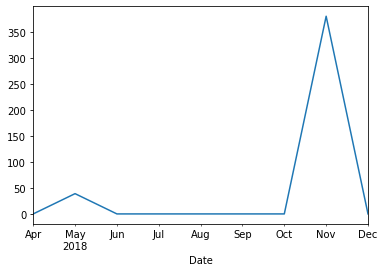

In [15]:
df.calories.resample("M").mean().plot.line()